[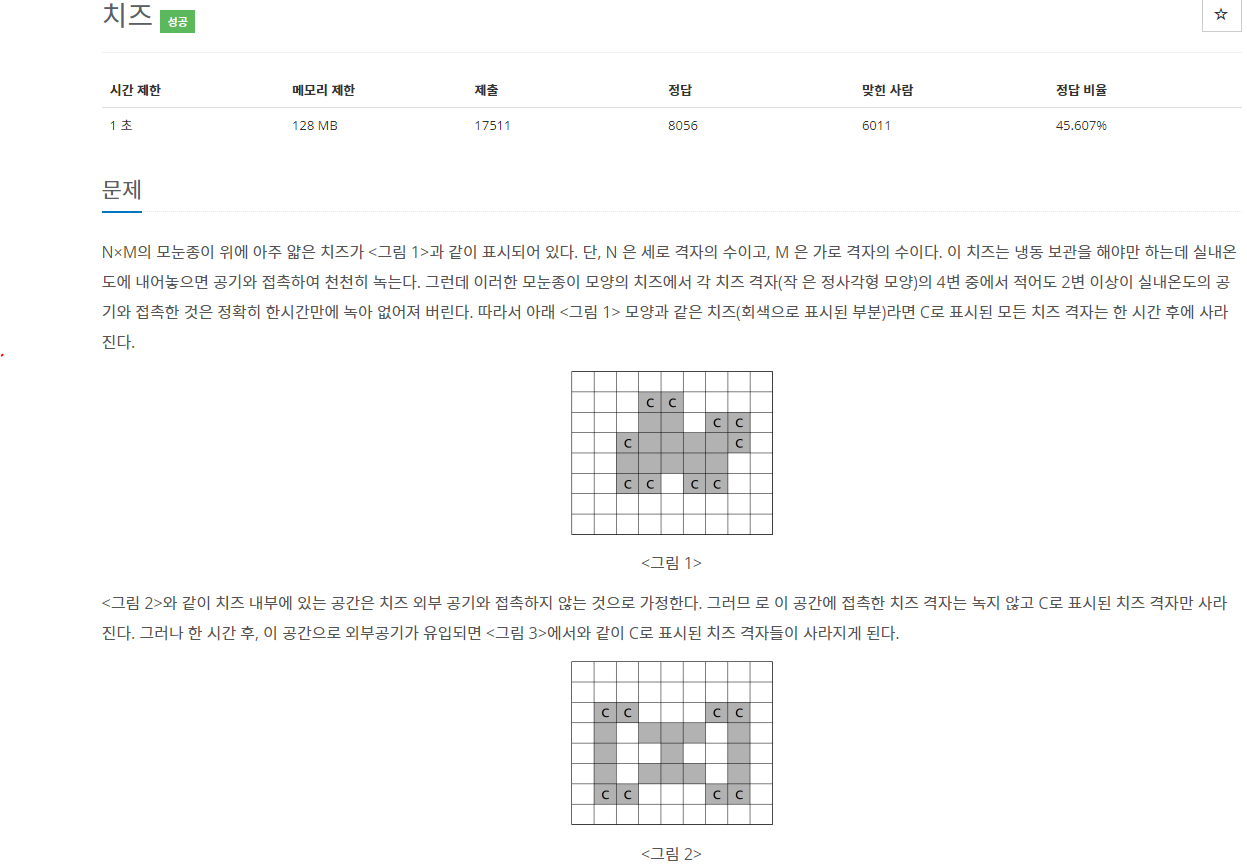](https://www.acmicpc.net/problem/2638)

---

In [ ]:
from copy import deepcopy
from collections import deque
import sys
input = sys.stdin.readline


def inside(x, y, cheeze):
    visited = [[0] * m for _ in range(n)]
    visited[x][y] = 1
    q = deque([(x, y)])
    while q:
        a, b = q.popleft()
        if a in (0, n - 1) or b in (0, m - 1):
            return 1
        for di, dj in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
            ni, nj = a + di, b + dj
            if not cheeze[ni][nj] and not visited[ni][nj]:
                visited[ni][nj] = 1
                q.append((ni, nj))

    return 0


def mold():
    new = deepcopy(cheeze)
    for i in range(n):
        for j in range(m):
            if cheeze[i][j]:
                cnt = 0
                for di, dj in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
                    ni, nj = i + di, j + dj
                    if not cheeze[ni][nj]:    # 근데 이 빈칸이 내부 공간일까?
                        if inside(ni, nj, cheeze):
                            cnt += 1

                if cnt >= 2:
                    new[i][j] = 0

    return new


n, m = map(int, input().split())
cheeze = [list(map(int, input().split())) for _ in range(n)]

t = 0

while 1:
    survive = 0
    for i in cheeze:
        survive += i.count(1)
    if not survive:
        print(t)
        exit()
    cheeze = mold()
    t += 1